In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 300)

In [5]:
data = pd.read_csv('../raw/PJT002_train.csv', )
data_val = pd.read_csv('../raw/PJT002_validation.csv', )

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (8,172,173,174,175,176,177,178,179) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
data.head()

,dt_of_fr,fr_yn,bldng_us,bldng_archtctr,bldng_cnt,bldng_ar,ttl_ar,lnd_ar,dt_of_athrztn,ttl_grnd_flr,ttl_dwn_flr,bldng_us_clssfctn,tmprtr,prcpttn,wnd_spd,wnd_drctn,hmdt,gas_engry_us_201401,ele_engry_us_201401,gas_engry_us_201402,ele_engry_us_201402,gas_engry_us_201403,ele_engry_us_201403,gas_engry_us_201404,ele_engry_us_201404,gas_engry_us_201405,ele_engry_us_201405,gas_engry_us_201406,ele_engry_us_201406,gas_engry_us_201407,ele_engry_us_201407,gas_engry_us_201408,ele_engry_us_201408,gas_engry_us_201409,ele_engry_us_201409,gas_engry_us_201410,ele_engry_us_201410,gas_engry_us_201411,ele_engry_us_201411,gas_engry_us_201412,ele_engry_us_201412,gas_engry_us_201501,ele_engry_us_201501,gas_engry_us_201502,ele_engry_us_201502,gas_engry_us_201503,ele_engry_us_201503,gas_engry_us_201504,ele_engry_us_201504,gas_engry_us_201505,ele_engry_us_201505,gas_engry_us_201506,ele_engry_us_201506,gas_engry_us_201507,ele_engry_us_201507,gas_engry_us_201508,ele_engry_us_201508,gas_engry_us_201509,ele_engry_us_201509,gas_engry_us_201510,ele_engry_us_201510,gas_engry_us_201511,ele_engry_us_201511,gas_engry_us_201512,ele_engry_us_201512,gas_engry_us_201601,ele_engry_us_201601,gas_engry_us_201602,ele_engry_us_201602,gas_engry_us_201603,ele_engry_us_201603,gas_engry_us_201604,ele_engry_us_201604,gas_engry_us_201605,ele_engry_us_201605,gas_engry_us_201606,ele_engry_us_201606,gas_engry_us_201607,ele_engry_us_201607,gas_engry_us_201608,ele_engry_us_201608,gas_engry_us_201609,ele_engry_us_201609,gas_engry_us_201610,ele_engry_us_201610,gas_engry_us_201611,ele_engry_us_201611,gas_engry_us_201612,ele_engry_us_201612,gas_engry_us_201701,ele_engry_us_201701,gas_engry_us_201702,ele_engry_us_201702,gas_engry_us_201703,ele_engry_us_201703,gas_engry_us_201704,ele_engry_us_201704,gas_engry_us_201705,ele_engry_us_201705,gas_engry_us_201706,ele_engry_us_201706,gas_engry_us_201707,ele_engry_us_201707,gas_engry_us_201708,ele_engry_us_201708,gas_engry_us_201709,ele_engry_us_201709,gas_engry_us_201710,ele_engry_us_201710,gas_engry_us_201711,ele_engry_us_201711,gas_engry_us_201712,ele_engry_us_201712,gas_engry_us_201801,ele_engry_us_201801,gas_engry_us_201802,ele_engry_us_201802,gas_engry_us_201803,ele_engry_us_201803,gas_engry_us_201804,ele_engry_us_201804,gas_engry_us_201805,ele_engry_us_201805,gas_engry_us_201806,ele_engry_us_201806,gas_engry_us_201807,ele_engry_us_201807,gas_engry_us_201808,ele_engry_us_201808,gas_engry_us_201809,ele_engry_us_201809,gas_engry_us_201810,ele_engry_us_201810,gas_engry_us_201811,ele_engry_us_201811,gas_engry_us_201812,ele_engry_us_201812,lw_13101010,lw_13101110,lw_13101210,lw_13101211,lw_13101310,lw_13101410,lw_13111010,lw_13111110,lw_13121010,lw_13121011,lw_13131010,lw_13131110,lw_13141010,lw_13141011,jmk,id,rgnl_ar_nm,rgnl_ar_nm2,lnd_us_sttn_nm,rd_sd_nm,emd_nm,hm_cnt,fr_sttn_dstnc,bldng_ar_prc,fr_wthr_fclt_dstnc,fr_mn_cnt,mlt_us_yn,cctv_dstnc,fr_wthr_fclt_in_100m,cctv_in_100m,tbc_rtl_str_dstnc,sft_emrgnc_bll_dstnc,ahsm_dstnc,no_tbc_zn_dstnc,bldng_cnt_in_50m,trgt_crtr,fr_fghtng_fclt_spcl_css_5_yn,fr_fghtng_fclt_spcl_css_6_yn,us_yn,dngrs_thng_yn,slf_fr_brgd_yn,blk_dngrs_thng_mnfctr_yn,cltrl_hrtg_yn
0,2017-10-20 05:54,Y,단독주택,블록구조,3,69.42,69.42,0.0,1977,1.0,0.0,주거용,10.7,NaN,0.9,200.0,96.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,대,106536,자연녹지지역,지정되지않음,단독,세로한면(불),경상남도 창녕군 창녕읍,17360.0,4547,NaN,133,137.0,N,112,0,0,1891,29231,11322,88,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2018-09-30 08:26,N,NaN,NaN,3,46.29,46.29,0.0,NaN,1.0,0.0,NaN,19.5,NaN,0.5,20.0,74.0,NaN,NaN,Na

In [6]:
data.shape

(59199, 180)

In [3]:
data.reset_index(drop=True, inplace=True)

In [114]:
# 토지면적은 건물건축면적보다 커야하므로 0으로 누락된 값을 채울 수 있다
data[['bldng_ar', 'lnd_ar']]

,bldng_ar,lnd_ar
0,69.420,0.000
1,46.290,0.000
2,583.800,1446.000
3,48.920,0.000
4,0.000,0.000
5,96.660,486.000
6,84.000,495.000
7,92.000,0.000
8,102.360,0.000
9,66.130,0.000


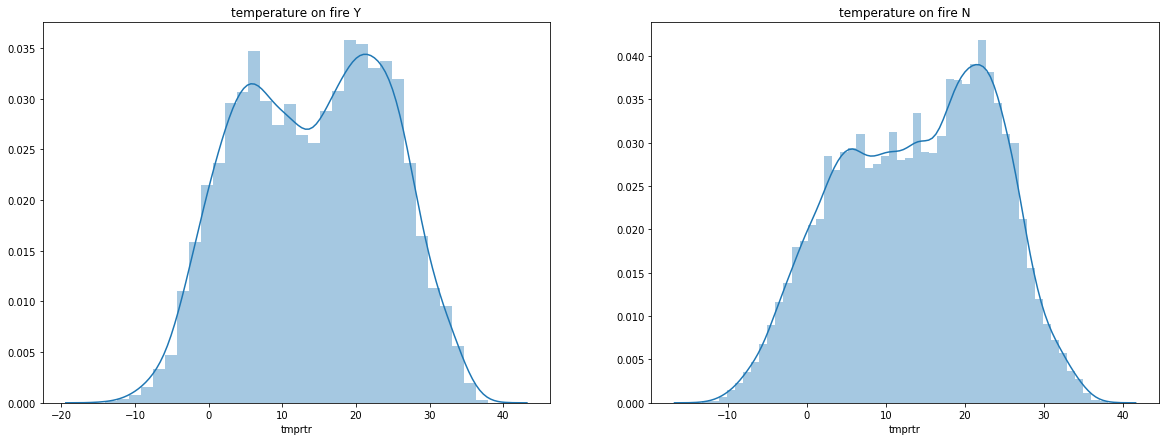

In [36]:
plt.figure(figsize=(20,7))
plt.subplot(1,2,1)
plt.title('temperature on fire Y', )
sns.distplot(data[data['fr_yn']=='Y']['tmprtr'])
plt.subplot(1,2,2)
plt.title('temperature on fire N')
sns.distplot(data[data['fr_yn']=='N']['tmprtr'].dropna())

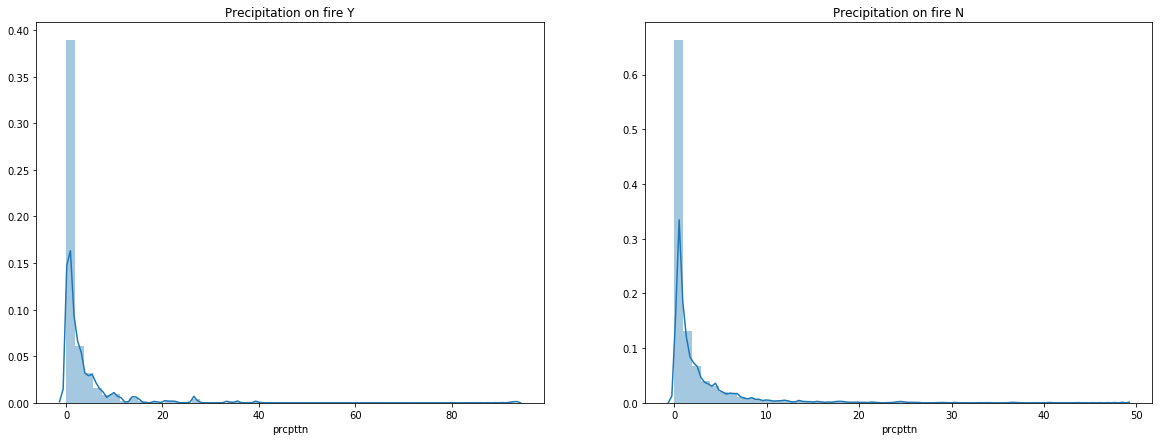

In [37]:
plt.figure(figsize=(20,7))
plt.subplot(1,2,1)
plt.title('Precipitation on fire Y', )
sns.distplot(data[data['fr_yn']=='Y']['prcpttn'].dropna())
plt.subplot(1,2,2)
plt.title('Precipitation on fire N')
sns.distplot(data[data['fr_yn']=='N']['prcpttn'].dropna())

### 가스 에너지 사용량 추이

In [41]:
tmp = data[data['fr_yn']=='Y'][['gas_engry_us_201401','gas_engry_us_201402','gas_engry_us_201403','gas_engry_us_201404','gas_engry_us_201405','gas_engry_us_201406','gas_engry_us_201407','gas_engry_us_201408','gas_engry_us_201409','gas_engry_us_201410','gas_engry_us_201411','gas_engry_us_201412',
                         'gas_engry_us_201501','gas_engry_us_201502','gas_engry_us_201503','gas_engry_us_201504','gas_engry_us_201505','gas_engry_us_201506','gas_engry_us_201507','gas_engry_us_201508','gas_engry_us_201509','gas_engry_us_201510','gas_engry_us_201511','gas_engry_us_201512',
                         'gas_engry_us_201601','gas_engry_us_201602','gas_engry_us_201603','gas_engry_us_201604','gas_engry_us_201605','gas_engry_us_201606','gas_engry_us_201607','gas_engry_us_201608','gas_engry_us_201609','gas_engry_us_201610','gas_engry_us_201611','gas_engry_us_201612',
                         'gas_engry_us_201701','gas_engry_us_201702','gas_engry_us_201703','gas_engry_us_201704','gas_engry_us_201705','gas_engry_us_201706','gas_engry_us_201707','gas_engry_us_201708','gas_engry_us_201709','gas_engry_us_201710','gas_engry_us_201711','gas_engry_us_201712',
                         'gas_engry_us_201801','gas_engry_us_201802','gas_engry_us_201803','gas_engry_us_201804','gas_engry_us_201805','gas_engry_us_201806','gas_engry_us_201807','gas_engry_us_201808','gas_engry_us_201809','gas_engry_us_201810','gas_engry_us_201811','gas_engry_us_201812',]]

In [63]:
x_name = pd.Series(tmp.iloc[0].keys()).apply(lambda x : x[-4:]).get_values()

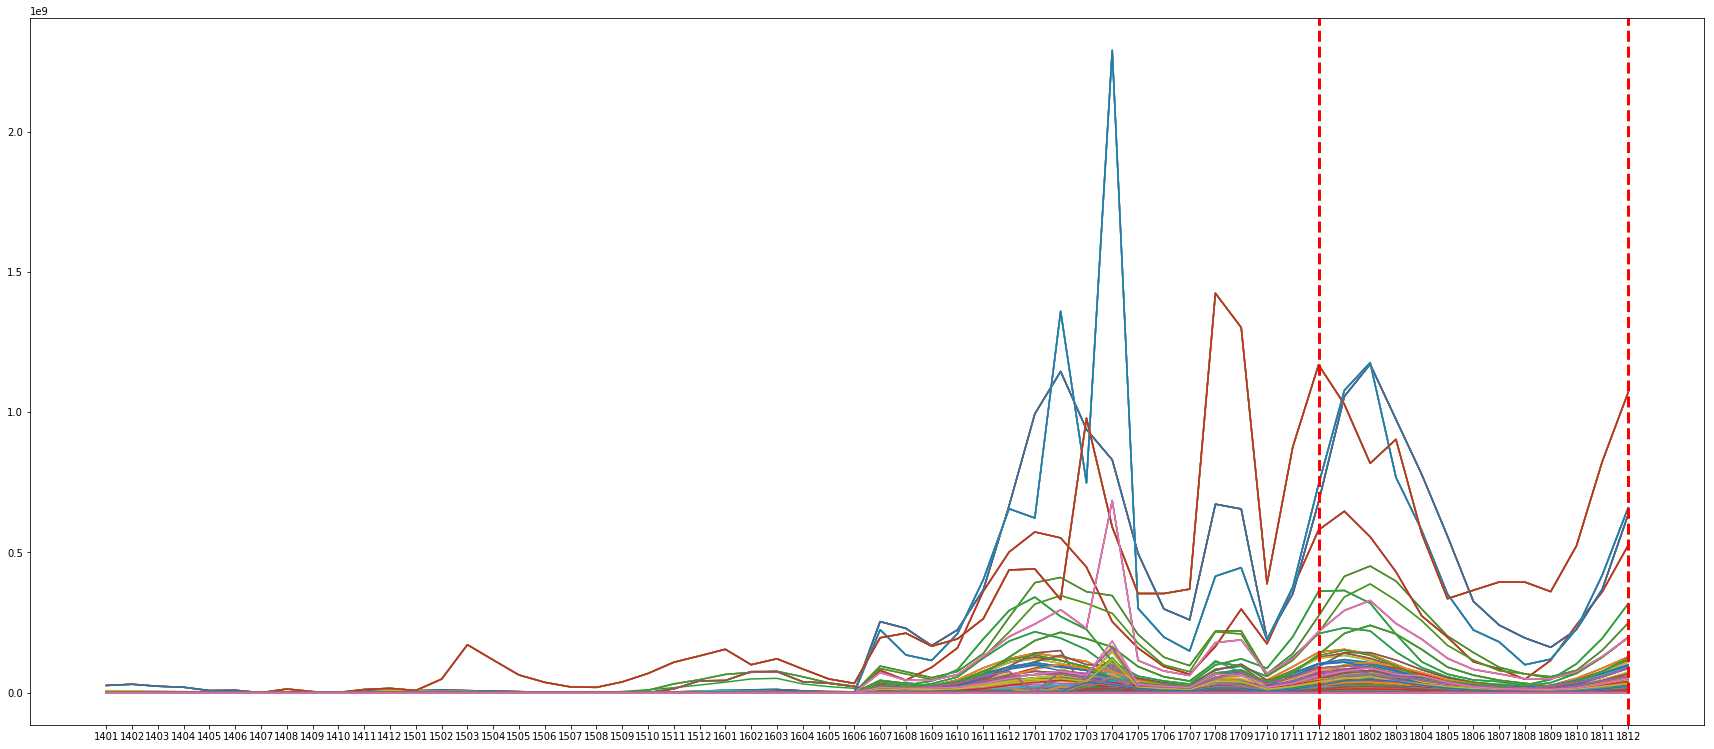

In [78]:
plt.figure(figsize=(30,13))
for i in range(len(tmp)):
    plt.plot(x_name, tmp.iloc[i].get_values())
plt.axvline(x='1712', color='r', linestyle='--', linewidth=3)
plt.axvline(x='1812', color='r', linestyle='--', linewidth=3)

In [79]:
tmp_n = data[data['fr_yn']=='N'][['gas_engry_us_201401','gas_engry_us_201402','gas_engry_us_201403','gas_engry_us_201404','gas_engry_us_201405','gas_engry_us_201406','gas_engry_us_201407','gas_engry_us_201408','gas_engry_us_201409','gas_engry_us_201410','gas_engry_us_201411','gas_engry_us_201412',
                         'gas_engry_us_201501','gas_engry_us_201502','gas_engry_us_201503','gas_engry_us_201504','gas_engry_us_201505','gas_engry_us_201506','gas_engry_us_201507','gas_engry_us_201508','gas_engry_us_201509','gas_engry_us_201510','gas_engry_us_201511','gas_engry_us_201512',
                         'gas_engry_us_201601','gas_engry_us_201602','gas_engry_us_201603','gas_engry_us_201604','gas_engry_us_201605','gas_engry_us_201606','gas_engry_us_201607','gas_engry_us_201608','gas_engry_us_201609','gas_engry_us_201610','gas_engry_us_201611','gas_engry_us_201612',
                         'gas_engry_us_201701','gas_engry_us_201702','gas_engry_us_201703','gas_engry_us_201704','gas_engry_us_201705','gas_engry_us_201706','gas_engry_us_201707','gas_engry_us_201708','gas_engry_us_201709','gas_engry_us_201710','gas_engry_us_201711','gas_engry_us_201712',
                         'gas_engry_us_201801','gas_engry_us_201802','gas_engry_us_201803','gas_engry_us_201804','gas_engry_us_201805','gas_engry_us_201806','gas_engry_us_201807','gas_engry_us_201808','gas_engry_us_201809','gas_engry_us_201810','gas_engry_us_201811','gas_engry_us_201812',]]

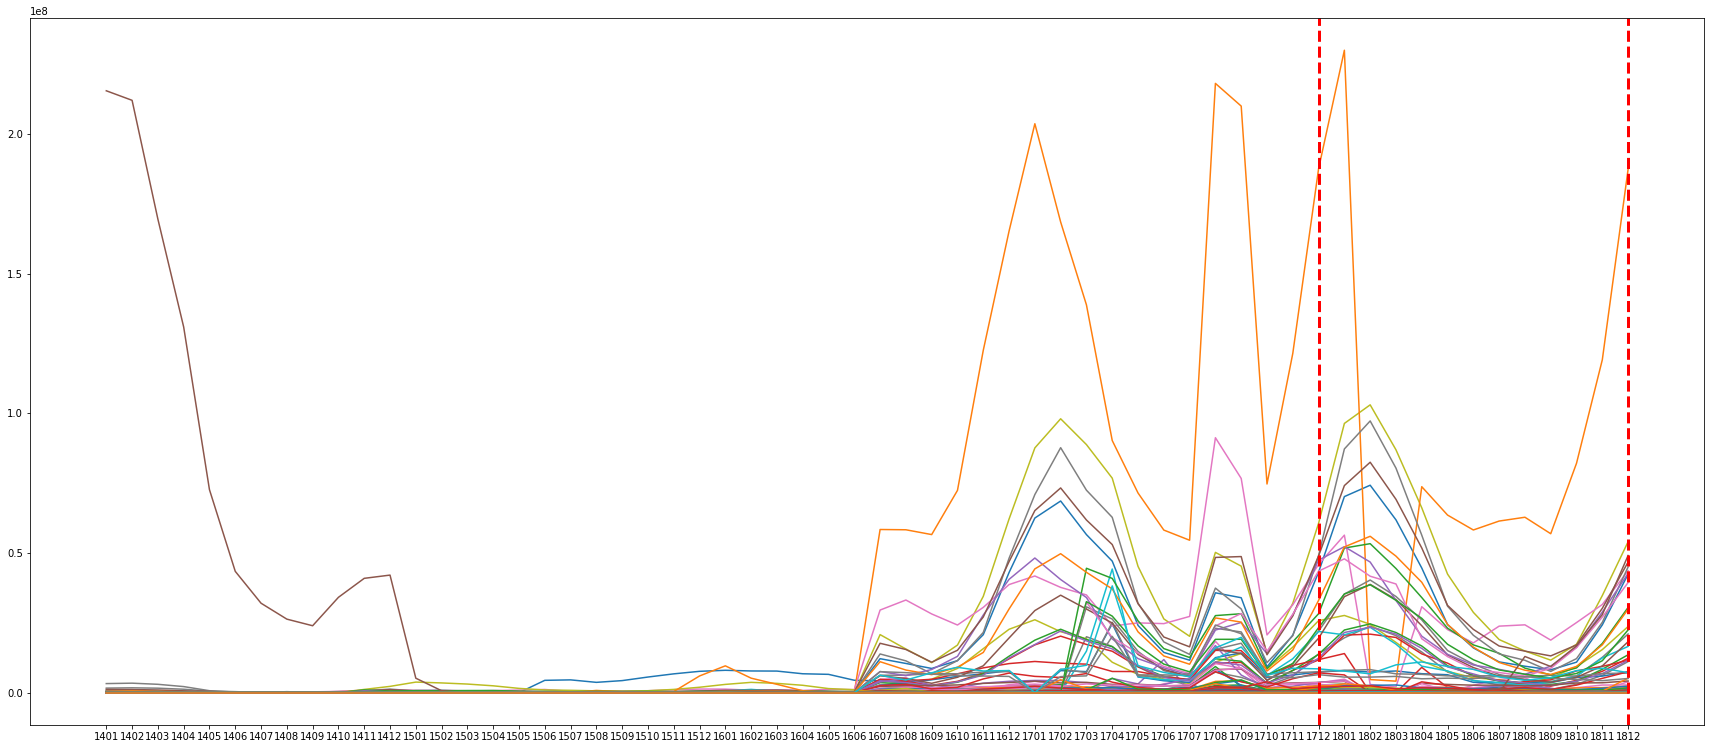

In [80]:
plt.figure(figsize=(30,13))
for i in range(len(tmp_n)):
    plt.plot(x_name, tmp_n.iloc[i].get_values())
plt.axvline(x='1712', color='r', linestyle='--', linewidth=3)
plt.axvline(x='1812', color='r', linestyle='--', linewidth=3)

In [82]:
data[data['fr_yn']=='Y']['fr_mn_cnt'].value_counts()

194.0    886
205.0    790
210.0    777
161.0    538
174.0    485
137.0    448
164.0    445
112.0    429
121.0    404
139.0    400
106.0    397
118.0    364
109.0    364
111.0    346
108.0    342
85.0     228
Name: fr_mn_cnt, dtype: int64

In [95]:
data['emd_nm'].astype(str)

0           경상남도 창녕군 창녕읍
1           경상남도 의령군 가례면
2           경상남도 창녕군 창녕읍
3        경상남도 창원시의창구 대산면
4           경상남도 창녕군 창녕읍
5           경상남도 창녕군 창녕읍
6           경상남도 창녕군 창녕읍
7           경상남도 창녕군 창녕읍
8           경상남도 창녕군 창녕읍
9           경상남도 창녕군 창녕읍
10          경상남도 창녕군 창녕읍
11          경상남도 창녕군 창녕읍
12          경상남도 창녕군 창녕읍
13          경상남도 창녕군 창녕읍
14          경상남도 창녕군 창녕읍
15          경상남도 창녕군 창녕읍
16          경상남도 창녕군 창녕읍
17          경상남도 창녕군 창녕읍
18          경상남도 창녕군 창녕읍
19          경상남도 창녕군 창녕읍
20          경상남도 창녕군 창녕읍
21          경상남도 창녕군 창녕읍
22          경상남도 창녕군 창녕읍
23          경상남도 창녕군 창녕읍
24          경상남도 창녕군 창녕읍
25          경상남도 창녕군 창녕읍
26          경상남도 창녕군 창녕읍
27          경상남도 창녕군 창녕읍
28          경상남도 창녕군 창녕읍
29          경상남도 창녕군 창녕읍
30          경상남도 함안군 칠서면
31          경상남도 창녕군 창녕읍
32          경상남도 창녕군 창녕읍
33          경상남도 창녕군 창녕읍
34          경상남도 창녕군 남지읍
35          경상남도 창녕군 남지읍
36          경상남도 창녕군 남지읍
37          경상남도 창녕군 남지읍
38          경상남도 창녕군 남지읍
39          경상남도 창녕군 남지읍


In [96]:
data['end_nm_edit'] = data['emd_nm'].astype(str).apply(lambda x : x[5:])

In [100]:
data['end_nm_edit'].value_counts()

거창군 거창읍              897
고성군 고성읍              803
함양군 함양읍              606
창녕군 창녕읍              494
남해군 남해읍              492
창원시의창구 북면            476
산청군 단성면              462
밀양시 상남면              434
남해군 창선면              434
진주시 천전동              428
밀양시 삼랑진읍             427
밀양시 무안면              426
창녕군 남지읍              414
함안군 가야읍              406
창원시의창구 동읍            406
함안군 군북면              404
통영시 광도면              397
밀양시 부북면              396
함양군 안의면              390
진주시 상대동              387
밀양시 하남읍              384
사천시 사천읍              380
남해군 남면               374
양산시 물금읍              367
하동군 진교면              366
밀양시 단장면              365
창녕군 대합면              361
합천군 합천읍              357
고성군 거류면              356
남해군 이동면              350
진주시 중앙동              346
남해군 고현면              345
거제시 사등면              344
남해군 삼동면              338
하동군 하동읍              337
창녕군 영산면              336
창원시의창구 봉림동           336
창원시의창구 명곡동           334
창원시의창구 대산면           331
양산시 상북면              329


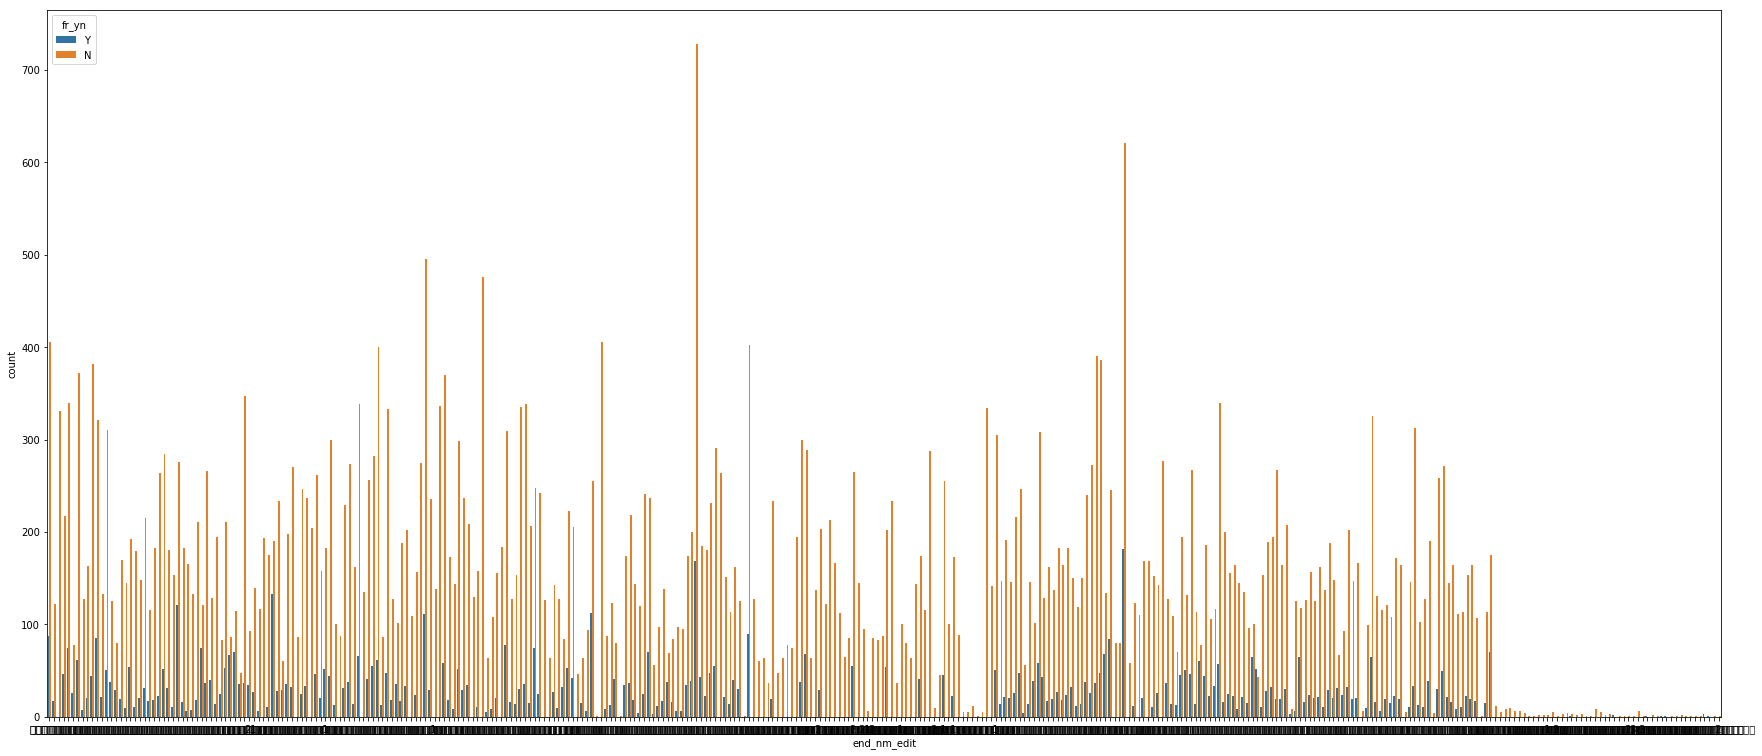

In [99]:
plt.figure(figsize=(30,13))
sns.countplot(data['end_nm_edit'] , hue=data['fr_yn'])

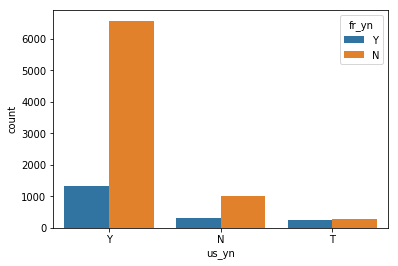

In [103]:
sns.countplot(data['us_yn'], hue=data['fr_yn'])

In [106]:
def plot_ratio(data, var):
    bldng_us_tmp = pd.DataFrame(dict(data[var].value_counts()), index = [0])
    bldng_us_y = pd.DataFrame(dict(data[data['fr_yn']=='Y'][var].value_counts()), index=[0])
    var_list=list(bldng_us_tmp.columns)
    for col1 in bldng_us_y.columns:
        var_list.remove(col1)
    for col2 in var_list:
        bldng_us_y[col2] = 0
    
    bldng_us_dict={}
    for col in bldng_us_tmp.columns:
        ratio = bldng_us_y[col][0] / bldng_us_tmp[col][0]
        col_name = col + ' (' +str(bldng_us_tmp.loc[0, col])+')'
        bldng_us_dict[col_name] = ratio
#         bldng_us_dict[col] = ratio
    
    plt.figure(figsize=(13,10))
    plt.title("{} 변수의 화재발생건수/데이터 비율 시각화".format(var))
    sns.barplot(x = list(bldng_us_dict.values()), y = list(bldng_us_dict.keys()), orient="h")
    print("변수 {}결측치 갯수 : {}".format(var, data[var].isnull().sum()))
    return None

변수 bldng_us결측치 갯수 : 27677


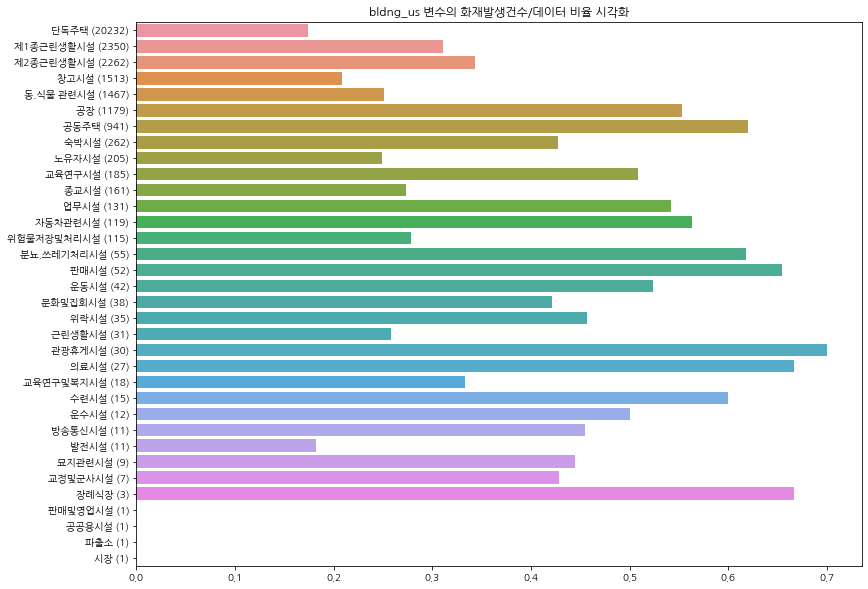

In [87]:
plot_ratio(data, 'bldng_us')

변수 bldng_archtctr결측치 갯수 : 27665


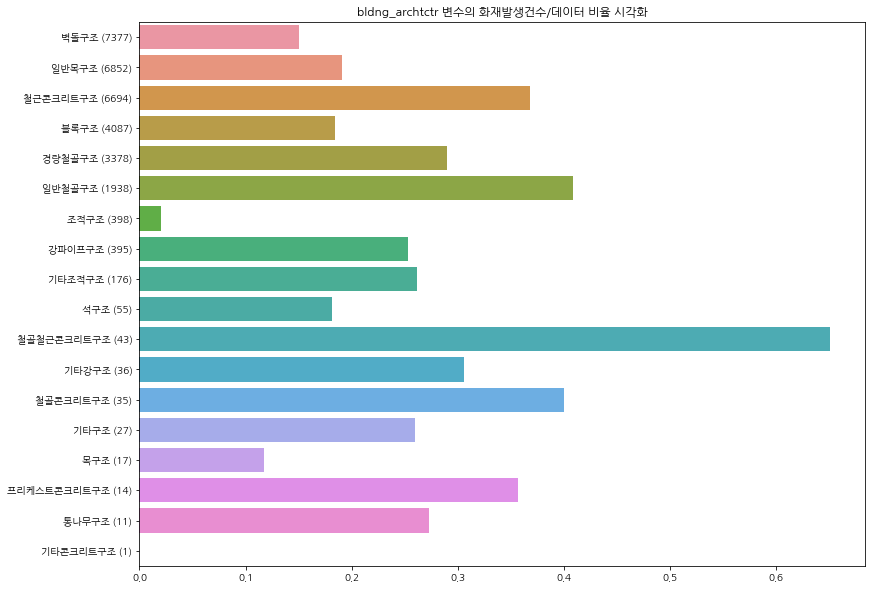

In [88]:
plot_ratio(data, 'bldng_archtctr')

변수 bldng_us_clssfctn결측치 갯수 : 29343


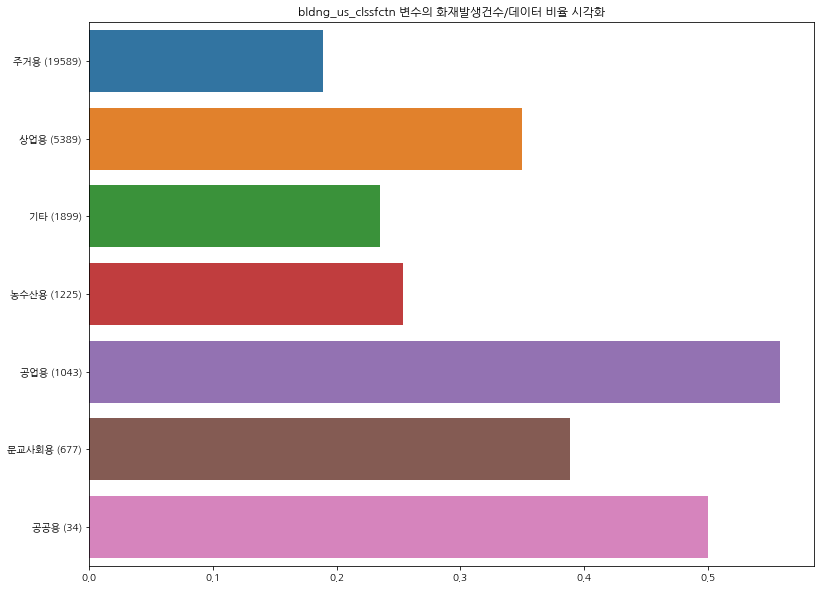

In [126]:
plot_ratio(data, 'bldng_us_clssfctn')

변수 jmk결측치 갯수 : 0


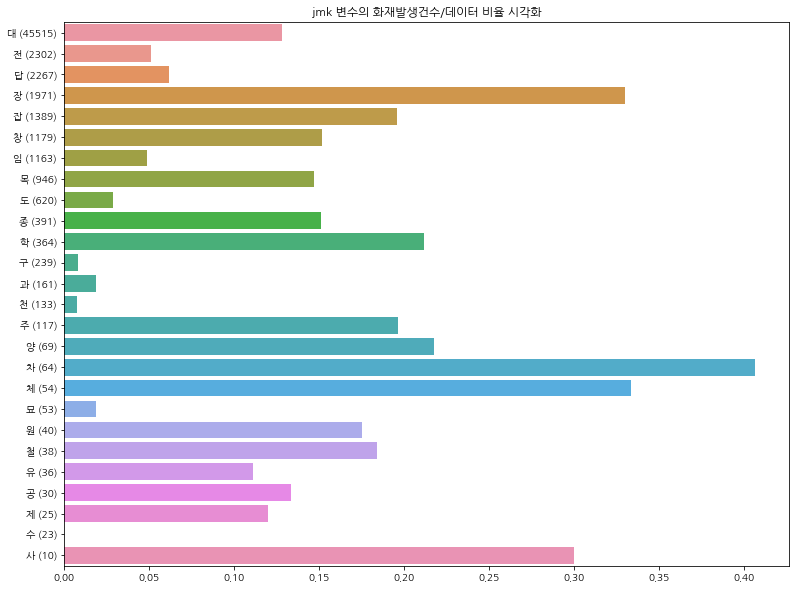

In [131]:
plot_ratio(data, 'jmk')

변수 lnd_us_sttn_nm결측치 갯수 : 1776


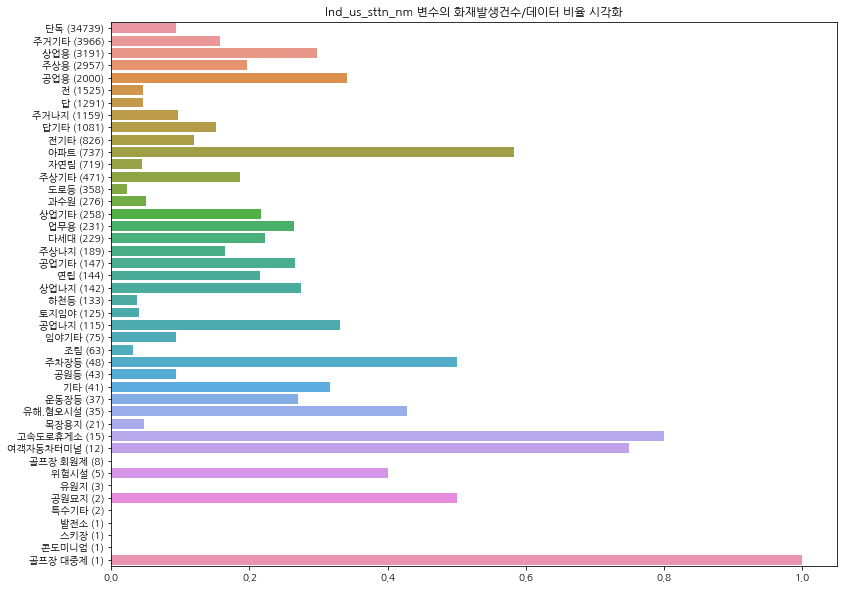

In [156]:
plot_ratio(data, 'lnd_us_sttn_nm')

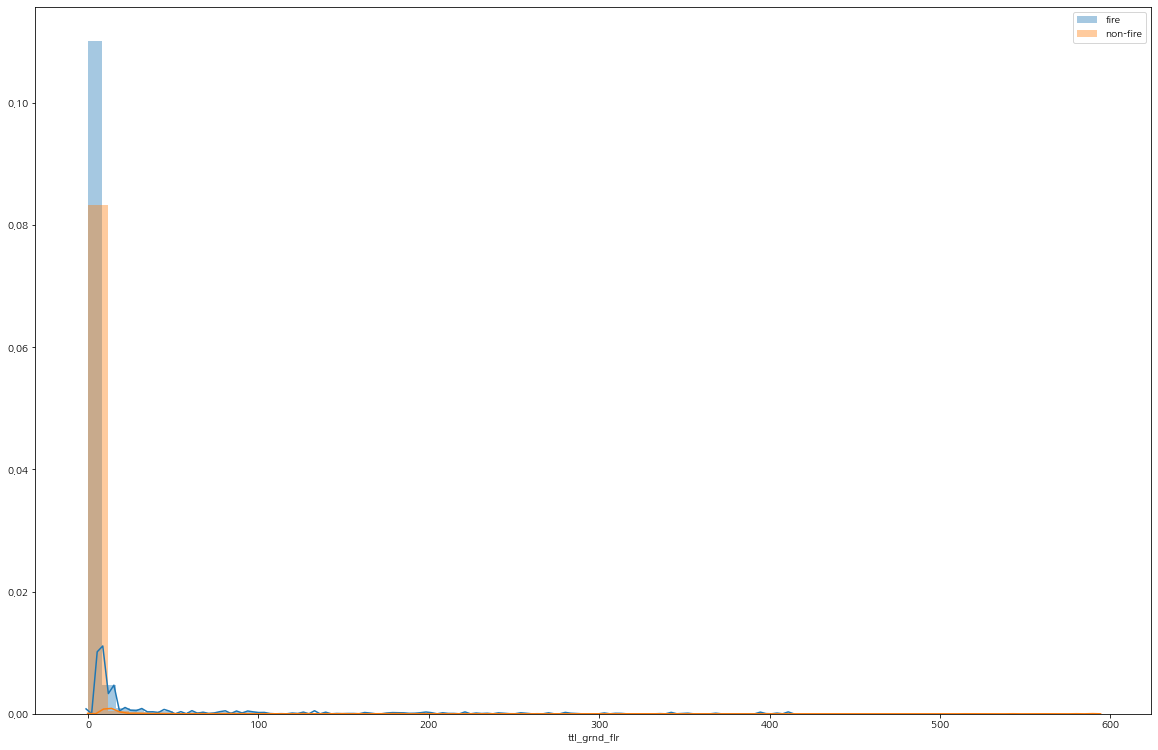

In [140]:
plt.figure(figsize=(20,13))
sns.distplot(data[data['fr_yn']=='Y']['ttl_grnd_flr'].dropna(),label='fire')
sns.distplot(data[data['fr_yn']=='N']['ttl_grnd_flr'].dropna(),label='non-fire')
plt.legend()

In [146]:
data[data['ttl_grnd_flr']>100][['bldng_cnt','ttl_grnd_flr','ttl_dwn_flr']]

,bldng_cnt,ttl_grnd_flr,ttl_dwn_flr
386,29,285.0,1.0
404,13,105.0,0.0
437,29,285.0,1.0
705,32,123.0,1.0
1151,64,331.0,5.0
2043,53,209.0,17.0
2692,31,242.0,17.0
2694,31,242.0,17.0
2704,31,242.0,17.0
2714,31,242.0,17.0


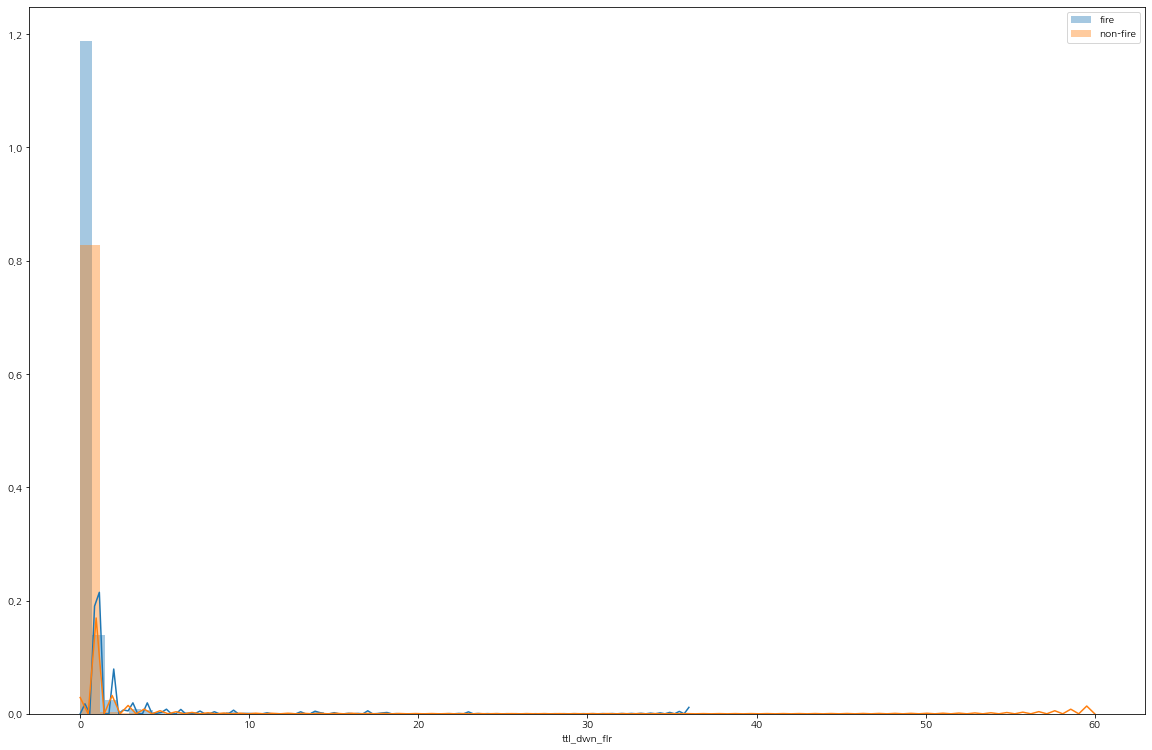

In [141]:
plt.figure(figsize=(20,13))
sns.distplot(data[data['fr_yn']=='Y']['ttl_dwn_flr'].dropna(),label='fire')
sns.distplot(data[data['fr_yn']=='N']['ttl_dwn_flr'].dropna(),label='non-fire')
plt.legend()

In [133]:
data['rd_sd_nm'].value_counts()

세로한면(가)    21117
세로한면(불)    15667
소로한면        8920
맹지          2300
소로각지        2213
중로한면        2170
세로각지(가)     2056
중로각지        1385
세로각지(불)      699
광대로한면        642
광대소각         424
광대세각          87
지정되지않음        28
Name: rd_sd_nm, dtype: int64